# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Allows us to access packages to analyze data
import pandas as pd
# Helps us in analyzing and breaking down arrays. 
import numpy as np

# To get different metric scores.
from sklearn import metrics
# Assists in displaying visualizations and graphs.
import matplotlib.pyplot as plt
%matplotlib inline 

# Allows us to make statistical analysis. 
import seaborn as sns
# Helps us in splitting the data into train and test datasets. 
from sklearn.model_selection import train_test_split
# The two following libraries allows us to use decision tree analysis.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer, 
    accuracy_score,
    roc_curve,
    confusion_matrix,
    roc_auc_score
)

# Allows us to use the GridSearchCV function
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [2]:
# We load the data provided by INN Hotels Group
data = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# Shape of the data, which turns out to have 36275 rows and 19 columns. 
data.shape

(36275, 19)

In [4]:
# We look at the first 5 rows of the dataset. 
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

On the surface, we see that bookings usually consist of one or two adults with no kids but that might be misleading. We also see that a majority of the customers have the just have the breakfast option ('Meal Plan 1'). We also see that most customers reserve a 'Room_Type 1" and all of them booked online. 

In [5]:
data.describe(include = 'all').T

count unique           top   freq  \
Booking_ID                              36275  36275      INN00001      1   
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
Booking_ID                                    NaN        NaN     NaN     NaN   
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
Booking_ID                               NaN     NaN     NaN  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest  

From this dataset, we see that the mean number of adults who per booking tends to be 2. We also see that children rarely stay in the hotel (with a very low average). We also see that most customers who book tended not to require a parking space and that the average person that books during the week tends to stay two nights. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We see that the columns that contain object type of data is the Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and book_status. All of these columns are perfectly fine to have object type of data since there are multiple selections and classifications.  We also see that avg_price_per_room is a float but that's logical as we're talking about dollars and cents. The other columns have integer types of data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [7]:
# To help assist in answering some of these questions, we establish a function
# named 'labeled_barplot', which will take in the data, the feature we specify,
# and then give us a labeled barplot with percentages at the top of each column. 
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    

# We also include a function that is called 'stacked_barplot', that takes in the 
# the data, a predictor variable, and a target variable. The target variable in 
# our case will be about whether someone cancelled their booking or not. 
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

    

# We also includ this function named 'stacked_barplot'. What this allows us to do is to 
# make a stacked graph, looking at the predictor and target variable of the dataset. 

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()   

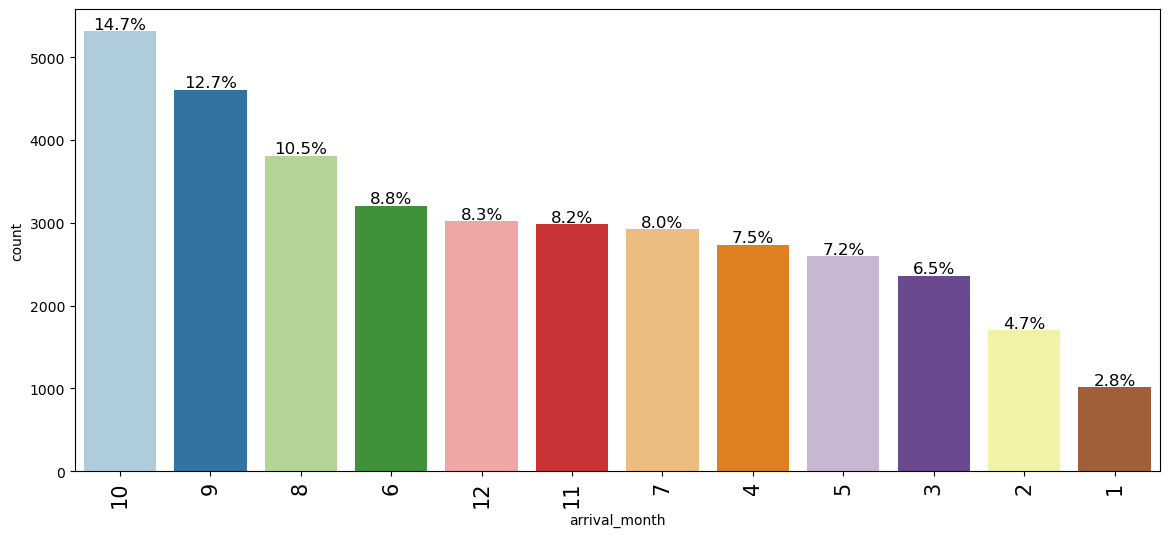

In [8]:
# To answer the first question regarding the busiest month in the hotel, 
# we use the labeled_barplot() function, and specify that we want to look at the 
# 'arrival_month' column of the data and we also want to see the percentages of 
# each value. Thus we can see how much the data consists of bookings in September 
# ('9') or in other months. 
labeled_barplot(data, 'arrival_month', perc = True)

From this graph, we see that a majority of the bookings are made in October, followed closely by September and August. The interesting thing is that these months are consectutive, consists of 37.9% of the data, and it increases as time passes until November. Thus, I would be curious as to whether there is marketing or some other method that encourages people to stay during these months. 

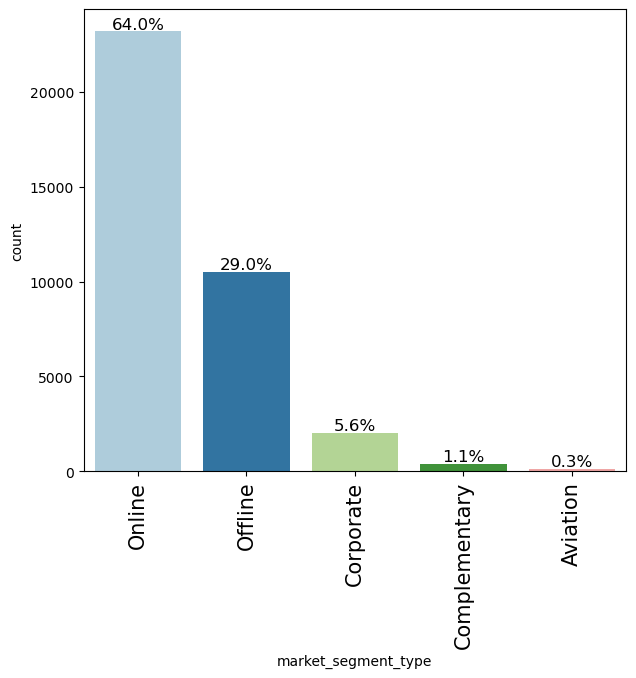

In [9]:
# We apply a similar method in analyzing the proportion of 
# types of Market segment. 
labeled_barplot(data, 'market_segment_type', perc = True)

In the plot displayed, we see that a majority of the customers that book are booking online. The follow-up are offline cases, where someone made a phone call or walked in and asked for a booking. Based on this, we can see that the hotel would do well to focus on marketing on the internet. 

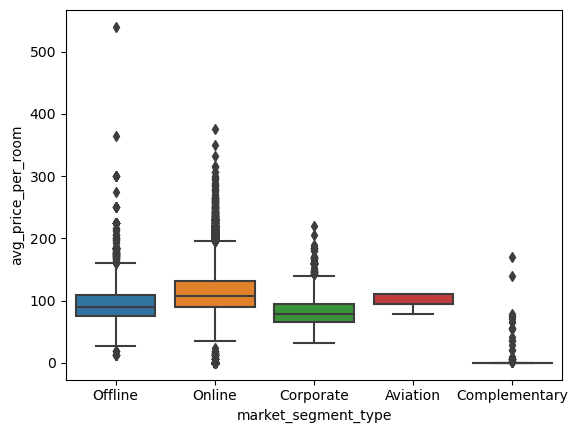

In [10]:
#3. Hotel rates are dynamic and change according to demand and customer demographics. 
# What are the differences in room prices in different market segments?

# Another question we have is whether, based on the data, there are differences in room prices in different market segments.
# In order to best answer this question, I decided to use a boxplot function, with 'market_segment_type' in the x-axis and
# 'avg_price_per_room'. 

sns.boxplot(data, x= 'market_segment_type', y = 'avg_price_per_room')
# Shows the graph with no coding messages. 
plt.show()

From the above graph, we see that the mean of those who book a room online tends to have a higher cost than those who order offline or those who use a coporate account. This is unusual considering how a majority of people that book a reservation do it online. It could have to do with customers online booking rooms that cost more or that they plan further ahead. We see that corporate segmentation is lower than the other market types (except comlementary), which may have to do with the low rate companies are charged or the room types booked on behalf of the employees.  

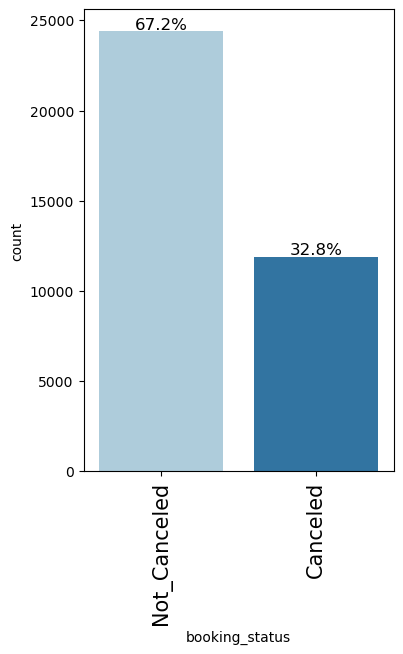

In [11]:
labeled_barplot(data, 'booking_status', perc = True)

We see from this graph that 67.2% of customers that make a booking do not cancel their reservation while 32.8% of the customers do cancel. This could range from a number of factors but the purpose of this dataset is to look at metrics we can measure. By using the methods available to us, we can make inference whether there's any variables that could make a positive or negative influence on the decision.

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


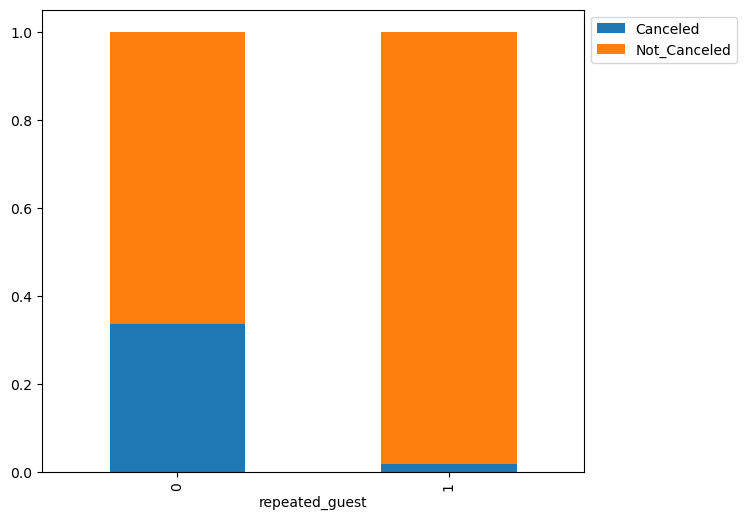

In [12]:
#5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

stacked_barplot(data, 'repeated_guest', 'booking_status')
plt.show()

 What percentage of repeating guests cancel?
 
From this graph, we see that a repeated guest is significantly less likely to cancel a booking than someone who is a first time customer. This is very helpful to us as it affirms that its not so much the service as something else that influences whether a person cancels their booking or not. However, we still see that minority of repeat guests do cancel their reservation, so there might be a service factor that we can identify and change to shrink that proportion. 

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


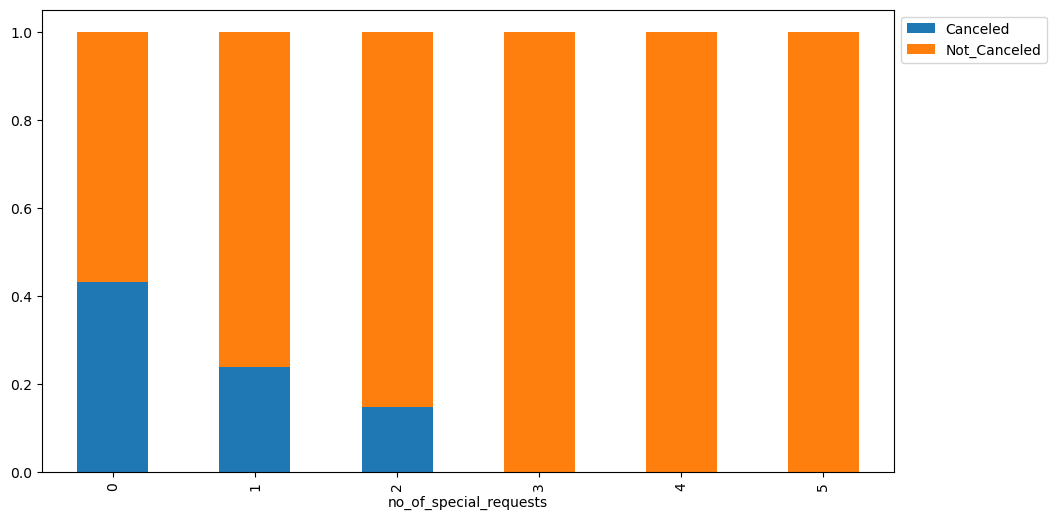

In [13]:
# We use the 'stacked_barplot()' function, looking at 'no_of_special_requests' as the predictor and 'booking_status' as the 
# target variable. 
stacked_barplot(data, 'no_of_special_requests', 'booking_status')



From this graph, we see that as the number of special requests increases from 0 to 2, the proportion of people cancelling their booking decreased. When we get to more than 2 special requests, the number of people who cancel their bookings is practically non-existant. Thus, we can see that the number special requests has an inverse relationship with cancellation.  


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [14]:
# We look to see the unique values in the 'type_of_meal_plan'
data['type_of_meal_plan'].unique()

# We look to see the unique values in the 'room_type_reserved'
data['room_type_reserved'].unique()



array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [15]:
# We make a copy of the data to avoid making direct changes to the read-in data
# Which we name df1
df1 = data.copy()

# We check to see if there are any duplicate rows in the dataset.
df1.duplicated().sum()

0

In [16]:
# We check to see if there are any missing values present in each column.
# Surprisingly, we don't see any missing values. 
df1.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [17]:
# We use this for loop to help us get 'object' data type columns into category type
# of variables. 
for feature in df1.columns: # Loop through all columns in the dataframe
    if df1[feature].dtype == 'object': # Only apply for columns with categorical strings
        df1[feature] = pd.Categorical(df1[feature])# Replace strings with an integer




# Next we look at the number unique values in 'type_of_meal_plan' column.
print(df1.type_of_meal_plan.value_counts())
# We look at the number unique values in 'room_type_reserved' column.
print(df1.room_type_reserved.value_counts())
# We look at the number unique values in 'market_segment_type' column.
print(df1.market_segment_type.value_counts())



Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


In [18]:
# Seeing what we know, we then restructure the categorical columns to
# instead have numeric values instead. 

# We create a dataset that replaces certain column values with numeric values.
replaceStruct = {
    # We have the meal plan be with the their respective meal plan number but for those cases where 
    # a meal plan was not selected, we have that value as a '-1' to make it clear that this
    # is a negative selection.
    "type_of_meal_plan":      {"Meal Plan 1": 1, "Meal Plan 2": 2, "Meal Plan 3": 3, "Not Selected": -1},
    "room_type_reserved": {"Room_Type 1": 1, "Room_Type 2": 2, "Room_Type 3": 3, "Room_Type 4": 4,
                           "Room_Type 5": 5, "Room_Type 6": 6, "Room_Type 7": 7},
    "market_segment_type": {"Online": 1, "Offline": 2, "Corporate": 3, "Complementary": 4, "Aviation": 5},
    "booking_status": {'Not_Canceled': 1, 'Canceled': 0}
}

# We make a df2 dataset, where we replace the categorical values with numerical values we specified.
df2 = df1.replace(replaceStruct)




# We convert the 'type_of_meal_plan' column into an integer data type.
df2['type_of_meal_plan'] = df2['type_of_meal_plan'].astype(int)


# We convert the 'room_type_reserved' column into an integer data type.
df2['room_type_reserved'] = df2['room_type_reserved'].astype(int)

# We convert the 'market_segment_type' column into an integer data type.
df2['market_segment_type'] = df2['market_segment_type'].astype(int)

# We convert the 'booking_status' column into an integer data type.
df2['booking_status'] = df2['booking_status'].astype(int)

# Displays information on the dataset 'df2', ensuring that a majority (except for the Booking_ID column) are numeric values. 
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  int32   
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  int32   
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

In [19]:
# We split the data, so we can prepare it for further analysis. 

# We create an 'X' variable that takes the df2 dataset and drop the 'booking_status' and 'Booking_ID' columns.
# We drop the 'Booking_ID' column as it's just an identifier and we drop 'booking_status' as we're trying to predict that.
X = df2.drop(['booking_status', 'Booking_ID'], axis = 1)
# We create Y to be the 'booking_status' column.
Y = df2['booking_status']

# adding a constant to X variable
X = add_constant(X)

# creating dummy variables, in case we missed something.  
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

## EDA

- It is a good idea to explore the data once again after manipulating it.

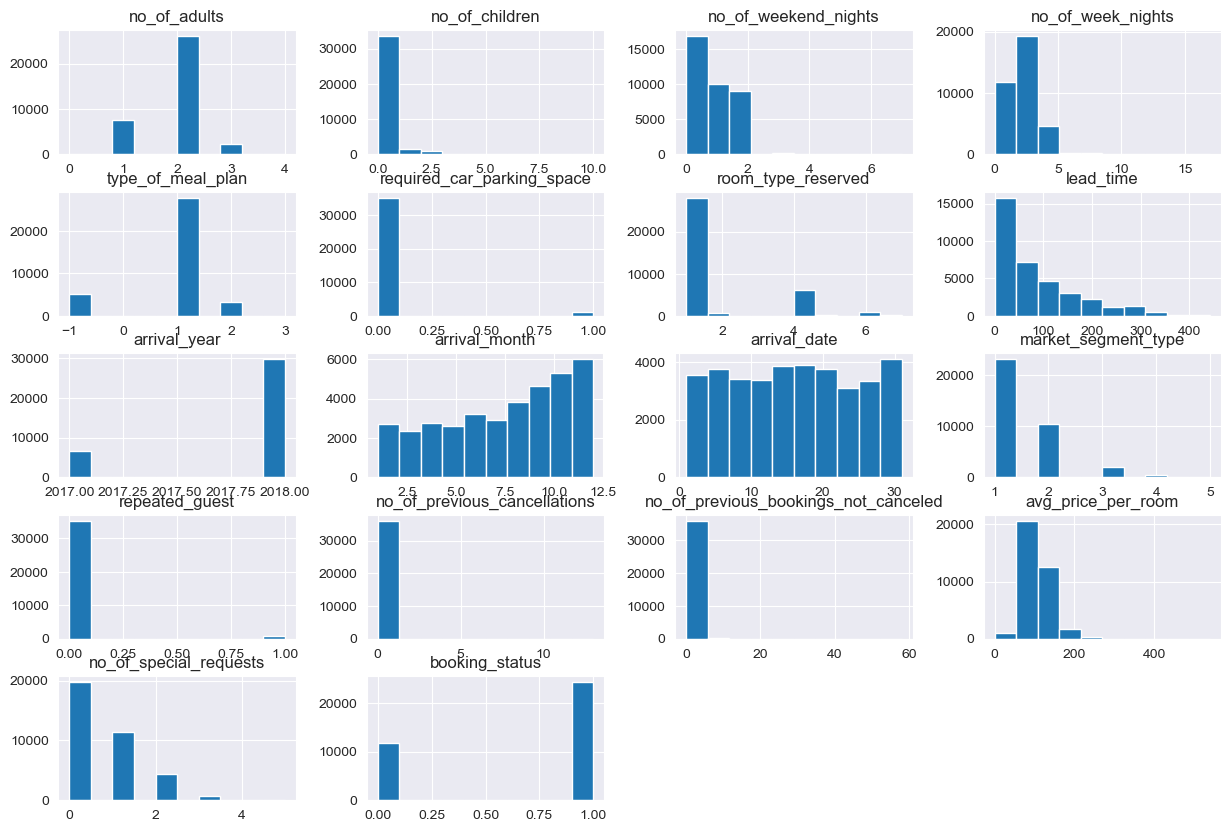

In [20]:
# While we could look at each distribution by making seperate graphs and analyze each one separately, its admittedly a
# bit much to do when we have 19 columns.So, we're going to look at them collectively together, to make it simplier.

# We use the default setting "darkgrid" asthestic theme.
sns.set_style("darkgrid")
# We then ask it to use the df2 dataset in making a series of histograms, with the size specified.
df2.hist(figsize=(15, 10))
# We display the graph with no coding messages. 
plt.show()


Admittedly, this isn't all the columns of the dataset (as we're missing 'Booking_ID'). However, this series of graphs does tell us the data lacks normal distribution. Some graphs, like 'repeated_guest', 'no_of_previous_cancellations', and 'no_of_previous_bookings_not_canceled' only have one column because its an accumulation of a non-zero value occuring. Now, to break down graph insight bit by bit.
- The number of adults that are involve in a booking tends to be two, rarely being more than that.
- The number of children involving in a booking tends to be non-existent.
- Most customers don't book for a night on the weekend, but maybe that's because its distribution is smaller than that of the weekdays.
- We see that most customers book to stay for approximately three nights during the week, rarely going as high as 5 nights.
- Most arrivals choose the Meal Plan 1 (breakfast only).
- A majority didn't require a parking space, which could indicate that most customers are local. 
- Most selected to have the option 1 type of room, which may have to do with cost or other amenities.
- The time between the booking and the arrival tends to be small, which means that the hotel caters to customers who only plan slightly ahead. 
- Most people who arrived at the hotel were in 2018. This might have to do with economics but its curious what made the jump from 2017 to 2018 (unless the hotel chain opened late in the year). 
- Most customers plan to arrive later in the year, from August to December. 
- Arrival Date histogram shows a uniform distribution, which can't really tell us much.
- Market segment tends to be those who book online.
- Average price of the room tends to be 0 and 200.
- Most people don't make special requests, which is a shame as an earlier graph indicated that people that don't make special requests tend not to cancel their booking.
- More peoople tend to not cancel their booking, which is a good sign. 

C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_8276\2352968919.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1)


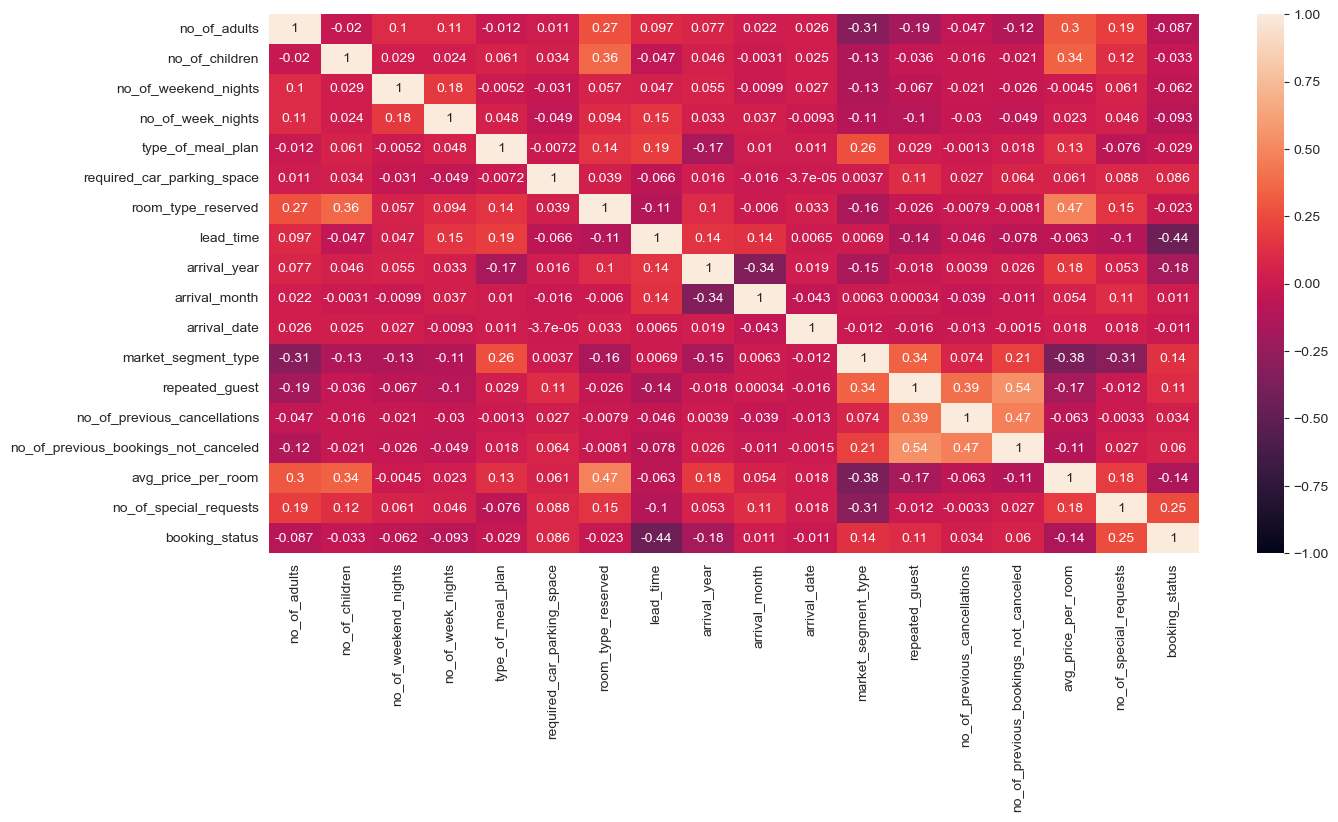

In [21]:
# We now move into making bivariate analysis, in looking to see if a variable correlates with another variable.

# We specify the size of the graph we're about to make
plt.figure(figsize=(15, 7))
# We make a heatmap graph of the df2 dataset, with annotations. We expand the correlation to be -1 and 1 so we can see
# positive and negative correlations.
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1)
# Displays the graph with no coding messages. 
plt.show()

- The 'lead_time' and 'booking_status' has a strong negative correlation between each other.
- Number of special requests correlates with the number of adults.
- Average price of the room being booked and room type positive correlates with the number of adults and number of children involved.
- The number of adults booking negatively correlates with market segmentation.
- Market segmentation corelates positively with meal plan.
- Meal plan and arrival year has a negative correlation with each other, which may indicate that the food or some other issue interfered with the service. 
- If a customer is a repeat customer, they have positive correlation between the number of times they have cancelled and times when they haven't cancelled their bookings.

<Figure size 1200x500 with 0 Axes>

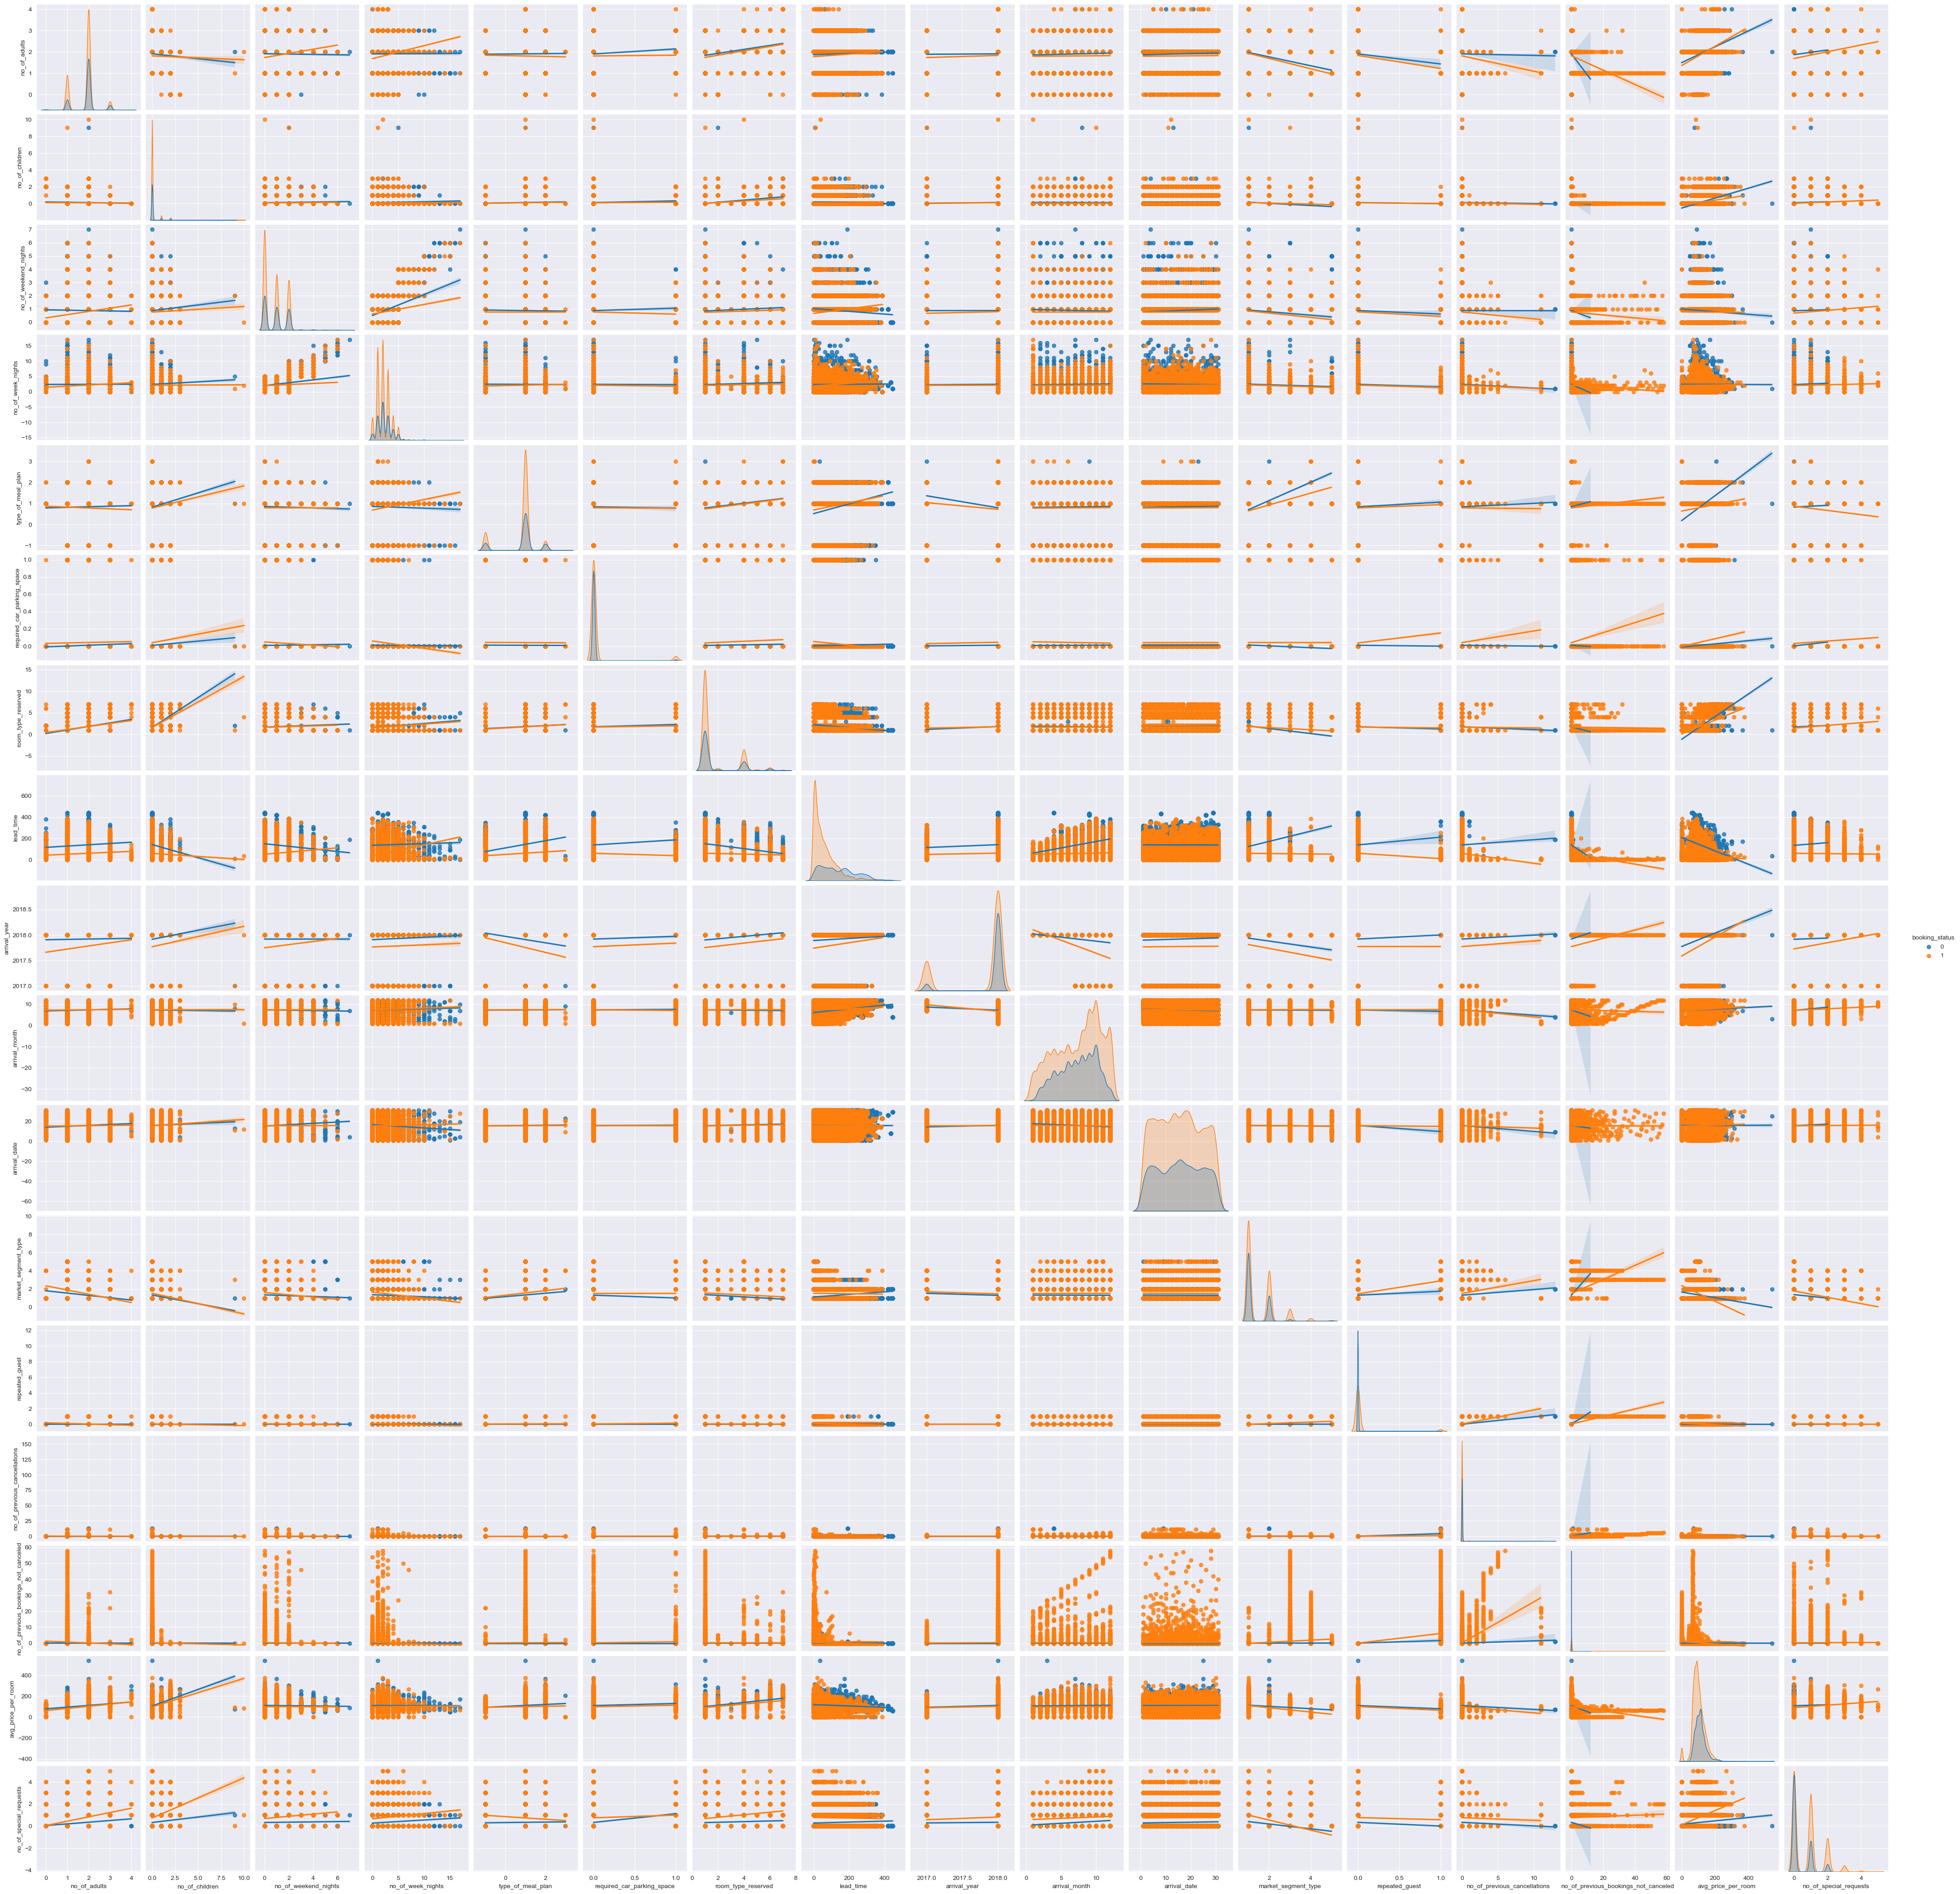

In [49]:
plt.figure(figsize=(12, 5))
# We make a pair plot, looking at the 'df2' dataset.
sns.pairplot(df2, hue="booking_status", kind = "reg")
# Shows the graph with no coding messages.
plt.show()

Admittedly, the pair graph we have is hard to make out, however, in studying the graph, we see some interesting correlations.
- Special requests and the number of kids has positive linear relationship in people not cancelling their bookings.
- The number of adults and checking in on a week night has a positive linear relationship with not cancelling their bookings.
- Room type and lead_time has a negative correlation with people cancelling their booking.
- There is a positve linear relationship of people cancelling their booking based on arrival month and type of room reserved.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [23]:
# We create the checking_vif() function, which helps us identify the 
# VIF scores of the predictor variables
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)

# We print the values of the calculated VIF for each variable.
print("VIF values: \n\n{}\n".format(vif_series))



VIF values: 

const                                   3.754992e+07
no_of_adults                            1.291706e+00
no_of_children                          1.266959e+00
no_of_weekend_nights                    1.060873e+00
no_of_week_nights                       1.082720e+00
type_of_meal_plan                       1.312574e+00
required_car_parking_space              1.029356e+00
room_type_reserved                      1.497096e+00
lead_time                               1.274362e+00
arrival_year                            1.367498e+00
arrival_month                           1.265919e+00
arrival_date                            1.005103e+00
market_segment_type                     1.649497e+00
repeated_guest                          1.676494e+00
no_of_previous_cancellations            1.358922e+00
no_of_previous_bookings_not_canceled    1.625360e+00
avg_price_per_room                      1.730931e+00
no_of_special_requests                  1.195382e+00
dtype: float64



We see that the only high VIF value we have is for the constant while the other variables have a VIF value between 1 and 2. This shows low multicollinearity, meaning that practically none of the other variables values correlate with the values in the other columns. This affirms that we cleaned up the data and makes it so we can preform our logistic regression with confidence that this assumption is satisfied. 

## Building a Logistic Regression model

In [24]:
# We fit the model on the training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.434582
         Iterations 12


In [25]:
# We look at the summary of the logistic regression model. 
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.3129
Time:                        13:24:15   Log-Likelihood:                -11035.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1067.0271    115.529      9.236      0.000     840.595    1293.459
no_of_adults                            -0.0365      

We have coeffiecients for the variables but we need to keep in mind that they're odd. We also see that a majority of the variables have are significant except for a handful of variables. This includes number of adults, number of children, arrival date, number of previous cancellations, and number of previous bookings not cancelled. This is reassuring in a way because it tells us that the regular service at the hotel is not the driving force behind cancellations. 

The null hypothesis for logistic regression is that there no relationship between the dependent variables and our independent variable (booking status). Since the p-value is high for some of these variables and exceeds our default level of significance, we will later have to drop some of these variables later on. 

## Model performance evaluation

In [26]:
# To see if we're predicting accurately or if this is just fluff, we take a look and see whether we can predict on
# on the training data to have default threshold greater 0.5 (50-50 chance) that the observation will be classified as 1. 

# We make a variable named 'pred_train' and look at caes where the threshold is greater than 0.5
pred_train = lg.predict(X_train) > 0.5
# We then round the values in the 'pred_train' variable. 
pred_train = np.round(pred_train)

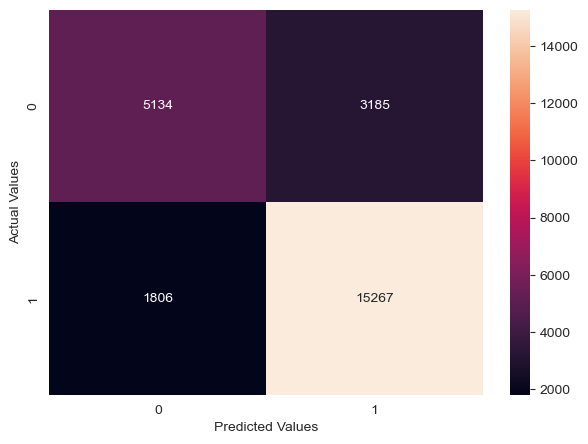

In [27]:
# We make a confusion matrix, using the y_train and pred_train datasets. 
cm = confusion_matrix(y_train, pred_train)
# We specify the size of the confusion matrix.
plt.figure(figsize=(7, 5))
# We make a heatmap, using the 'cm' variable. 
sns.heatmap(cm, annot=True, fmt="g")
# We specify the x-axis label to be 'Predicted Values'
plt.xlabel("Predicted Values")
# We label the y-axis to be 'Actual Values'
plt.ylabel("Actual Values")
# We display the confusion matrix without coding messages. 
plt.show()

We see that of the data present that 5134 cases are correctly identified as cancelling their booking. We also see that 1806 cases were incorrectly identified as not cancelling their request but they did anyway. Of the 36275 cases, 15267 cases booked their reservations and were not predicted to cancel while the 1806 were predicted to cancel their reservations but didn't. 

In [28]:
# We print the accuracy of our training set.
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

Accuracy on training set :  0.8034420289855072


From this we see that our model is roughly 80% accurate which confirms that our model is relatively accurate. However, we should keep in mind that the variables that we know aren't significant may be impacting our accuracy of predicting whether someone will cancel their booking or not. 

## Final Model Summary

In [29]:
# We remove the columns that according to the Logistic model earlier, showed to be not significant. 

X_2 = X.drop(['arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
              'no_of_adults','no_of_children'], axis = 1)

# We make new training and test datasets based on the changes we made.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, Y, test_size=0.30, random_state=1, stratify=Y
)



# We once again make a new logistic regression model.
logit_2 = sm.Logit(y_train, X_train_2.astype(float))
# We fit the logistic regression model
lg_2 = logit_2.fit()


Optimization terminated successfully.
         Current function value: 0.434697
         Iterations 11


In [30]:
# We print a summary of the logistic regression model. 
print(lg_2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25379
Method:                           MLE   Df Model:                           12
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.3127
Time:                        13:24:16   Log-Likelihood:                -11038.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1064.4659    115.359      9.227      0.000     838.367    1290.565
no_of_weekend_nights          -0.1488      0.019     -7.654      0.000      -0.187 

In [31]:
# We determine accuracy of the training dataset.
pred_train_2 = lg_2.predict(X_train_2)
pred_train_2 = np.round(pred_train_2)

# We print the accuracy of the training dataset. 
print("Accuracy on training set : ", accuracy_score(y_train, pred_train_2))


Accuracy on training set :  0.8030875866414618


Based on this, we see that our accuracy on the training set is relatively high, though not significantly different from our accuracy before we made changes. 

In [32]:
# We convert the coefficients of our logistic regression model into odds
odds = np.exp(lg_2.params)

# We add the odds to an empty dataframe. 
pd.DataFrame(odds, X_train_2.columns, columns=["odds"]).T

C:\Users\Neal Daniels\Anaconda 2\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


const  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  \
odds    inf              0.861704           0.942602           1.119776   

      required_car_parking_space  room_type_reserved  lead_time  arrival_year  \
odds                    4.474784            1.078079   0.985922      0.590438   

      arrival_month  market_segment_type  repeated_guest  avg_price_per_room  \
odds       1.040367             3.392926        2.520058            0.982211   

      no_of_special_requests  
odds                3.989345

In [33]:
# Now we find the percentages of change
perc_change_odds = (np.exp(lg_2.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train_2.columns, columns=["change_odds%"]).T

C:\Users\Neal Daniels\Anaconda 2\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


const  no_of_weekend_nights  no_of_week_nights  \
change_odds%    inf            -13.829649          -5.739763   

              type_of_meal_plan  required_car_parking_space  \
change_odds%          11.977628                  347.478446   

              room_type_reserved  lead_time  arrival_year  arrival_month  \
change_odds%            7.807904  -1.407811    -40.956236       4.036707   

              market_segment_type  repeated_guest  avg_price_per_room  \
change_odds%           239.292624      152.005771           -1.778936   

              no_of_special_requests  
change_odds%              298.934532

- Holding all other features constant, a unit change in 'no_of_weekend_nights' increase the odds of person cancelling their booking by 0.1488 or 13.83% increase in the odds of cancelling (we have to keep in mind that in this case, the closer we get to zero, the more likely someone will cancel).  

- Holding all other features constant, a unit change in 'no_of_week_nights' increase the odds of person cancelling their booking by 0.0591 or 5.74% increase in the odds of cancelling.  

- Holding all other features constant, a unit change in the meal plan selected (or not selected, should they decide) decreases the odds of person cancelling their booking by 0.1131 or 11.98% decrease in the odds of cancelling.  

- Holding all other features constant, a unit change in the needing a parking space decreases the odds of person cancelling their booking by 1.4985 or 347.48% decrease in the odds of cancelling.  

- Holding all other features constant, a unit change in the reserving a certain type of room decreases the odds of person cancelling their booking by 0.0752 or 7.81% decrease in the odds of cancelling.

- Holding all other features constant, a unit change in 'lead_time' increases the odds of person cancelling their booking by 0.0142 or 1.41% increase in the odds of cancelling.


- Holding all other features constant, a unit change in 'arrival_year' increases the odds of person cancelling their booking by 0.5269 or 40.956% increase in the odds of cancelling.

- Holding all other features constant, a unit change in 'arrival_month' decreases the odds of person cancelling their booking by 0.0396 or 4.04% decrease in the odds of cancelling

- Holding all other features constant, a unit change in 'market_segment_type' decreases the odds of person cancelling their booking by 1.2217 or 239.29% decrease in the odds of cancelling.

- Holding all other features constant, a unit change regarding a person being a repeat customer decreases the odds of person cancelling their booking by 0.9243 or 152.01% decrease in the odds of cancelling.

- Holding all other features constant, a unit change in the average price per room increases the odds of person cancelling their booking by 0.0179 or 1.778% increase in the odds of cancelling.

- Holding all other features constant, a unit change in the number of special requests will decreases the odds of person cancelling their booking by 1.3836 or 298.93% decrease in the odds of cancelling.

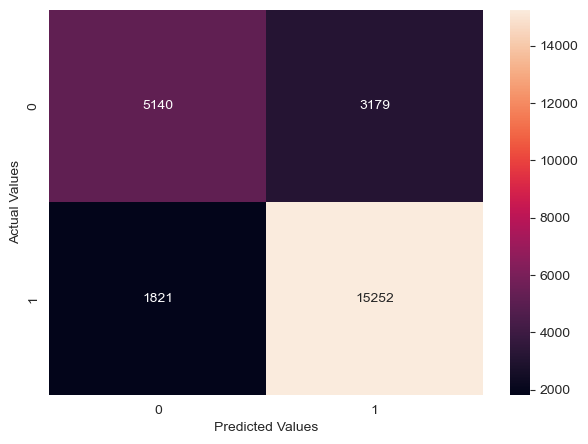

In [34]:
# We make another confusion matrix, this time looking at the new logistic regression model.
cm = confusion_matrix(y_train, pred_train_2)
# Specify the size of the graph
plt.figure(figsize=(7, 5))
# We make a display of the confusion matrix by using the heatmap.
sns.heatmap(cm, annot=True, fmt="g")
# We label the x axis with "Predicted Values"
plt.xlabel("Predicted Values")
# Label the y-axis with "Actual Values"
plt.ylabel("Actual Values")
# Displays the graph with no coding messages. 
plt.show()

From this graph, we see that 5140 customers were predicted to cancel their requests and did so. However, we failed to predict that 3179 customers would cancel but they did. However, we also see that we predicted that 15252 customers would not cancel their bookings and that's what happened. In addition, we see that 1821 cases were predicted to cancel their bookings but they didn't.  

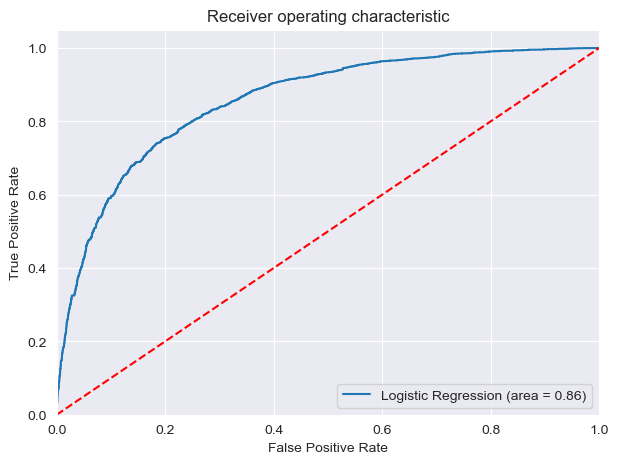

In [35]:
# We then make a ROC Curve on the training set as we are unsure how accurate our model and would like to better 
# ensure our probability of predicting a customer's cancellation accurately.

logit_roc_auc_train = roc_auc_score(y_train, lg_2.predict(X_train_2))
fpr, tpr, thresholds = roc_curve(y_train, lg_2.predict(X_train_2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

From this ROC Curve, we see that the area under the curve is 0.86. This means that the model is performing well on the training set.

In [36]:
#Now, we use the model to make predictions on the test data.

# We first drop the same columns we dropped in the X_train_2 columns.
X_test_2 = X_test.drop(['arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
              'no_of_adults','no_of_children'], axis=1)

# We set the threshold of of the predicted probability of the test data set to
# be greater than 0.5. Thus the values will be classified as 1 (not cancelling).
# We set this calculation to be 'pred_test_3'.
pred_test_3 = lg_2.predict(X_test_2) > 0.5
# We round the threshold of the earlier value.
pred_test_3 = np.round(pred_test_3)

# We print the accuracy of the model on the training data set
print("Accuracy on training set : ", accuracy_score(y_train, pred_train_2))
# We print the accuracy of the model on the test data set
print("Accuracy on test set : ", accuracy_score(y_test, pred_test_3))

Accuracy on training set :  0.8030875866414618
Accuracy on test set :  0.8050169989892493


We have it that the accuracy of the training and test data sets are relatively the same, which means that our data is not underfitting or overfitting. 

## Building a Decision Tree model

In [37]:
# This code is used to make a decision tree with the criterion set to 'gini' as we want to use the Gini Index in 
# making a classifying decision tree. We also set the max depth of the decision tree to 5, to make it so we can 
# see what it tells us, without overfitting.
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=1)
# We then fit the decsion tree model with the X_train and y_train datasets. 
dTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [38]:
# We look at the accuracy of the decision tree using the training dataset. 
print("Accuracy on training set : ",dTree.score(X_train, y_train))
# We also look at the accuracy of the decision tree using the test dataset. 
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.837822936357908
Accuracy on test set :  0.8327667003583571


Admittedly, The numbers are not significantly as high as we would like but considering that this is a first attempt, the accuracy of the decision tree is remarkably high and its approximately the same whether we're looking at the test or training data sets. Therefore, we know our decision tree model isn't overfitting or underfitting. 

In [39]:
#We check for the number of positives
Y.sum(axis = 0)

24390

We have 24390 positives out of 36275 (I used the Y.shape to get that number), which means that we get a majority of the decision tree (roughly 93%) is positive. This aligns with our earlier analysis that only a small percentage of customers cancel their bookings. 

In [40]:
# We create a 'make_confusion_matrix' function that we can later use to create
# a confusion matrix.
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

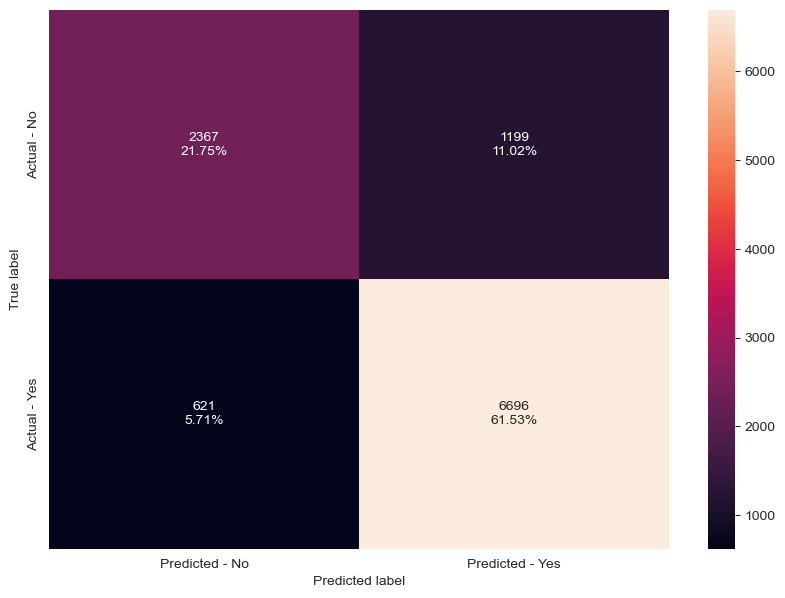

In [41]:
# We make a confusion matrix, based on the y_test
make_confusion_matrix(dTree,y_test)

From this graph, we see that approximately 21.75% were predicted to cancel and did decide to cancel their booking. We also see that 5.71% didn't cancel their booking but they were predicted to do so. We also see that 11.02% were predicted to keep to their agreement regarding the booking but decided to withdraw their booking requests. We also see that 61.53% were predicted to keep their booking and did so. Together, we're looking at 67.24% who decided to stay with with their bookings, with 32.77% cancelling their bookings, based on the Decision Tree algorithm. 

In [42]:
# We then look at the recall of the decision tree to help us better analzyze its accuracy
#We do this by looking at the Recall of the decision tree, both the training data set and test data set.
get_recall_score(dTree)

Recall on training set :  0.9218063609207521
Recall on test set :  0.915129151291513


In [43]:
# We make a variable named "feature_names" which takes all the column names of the "X" variable.
feature_names = list(X.columns)
# We print the list contained in the "feature_names" column.
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


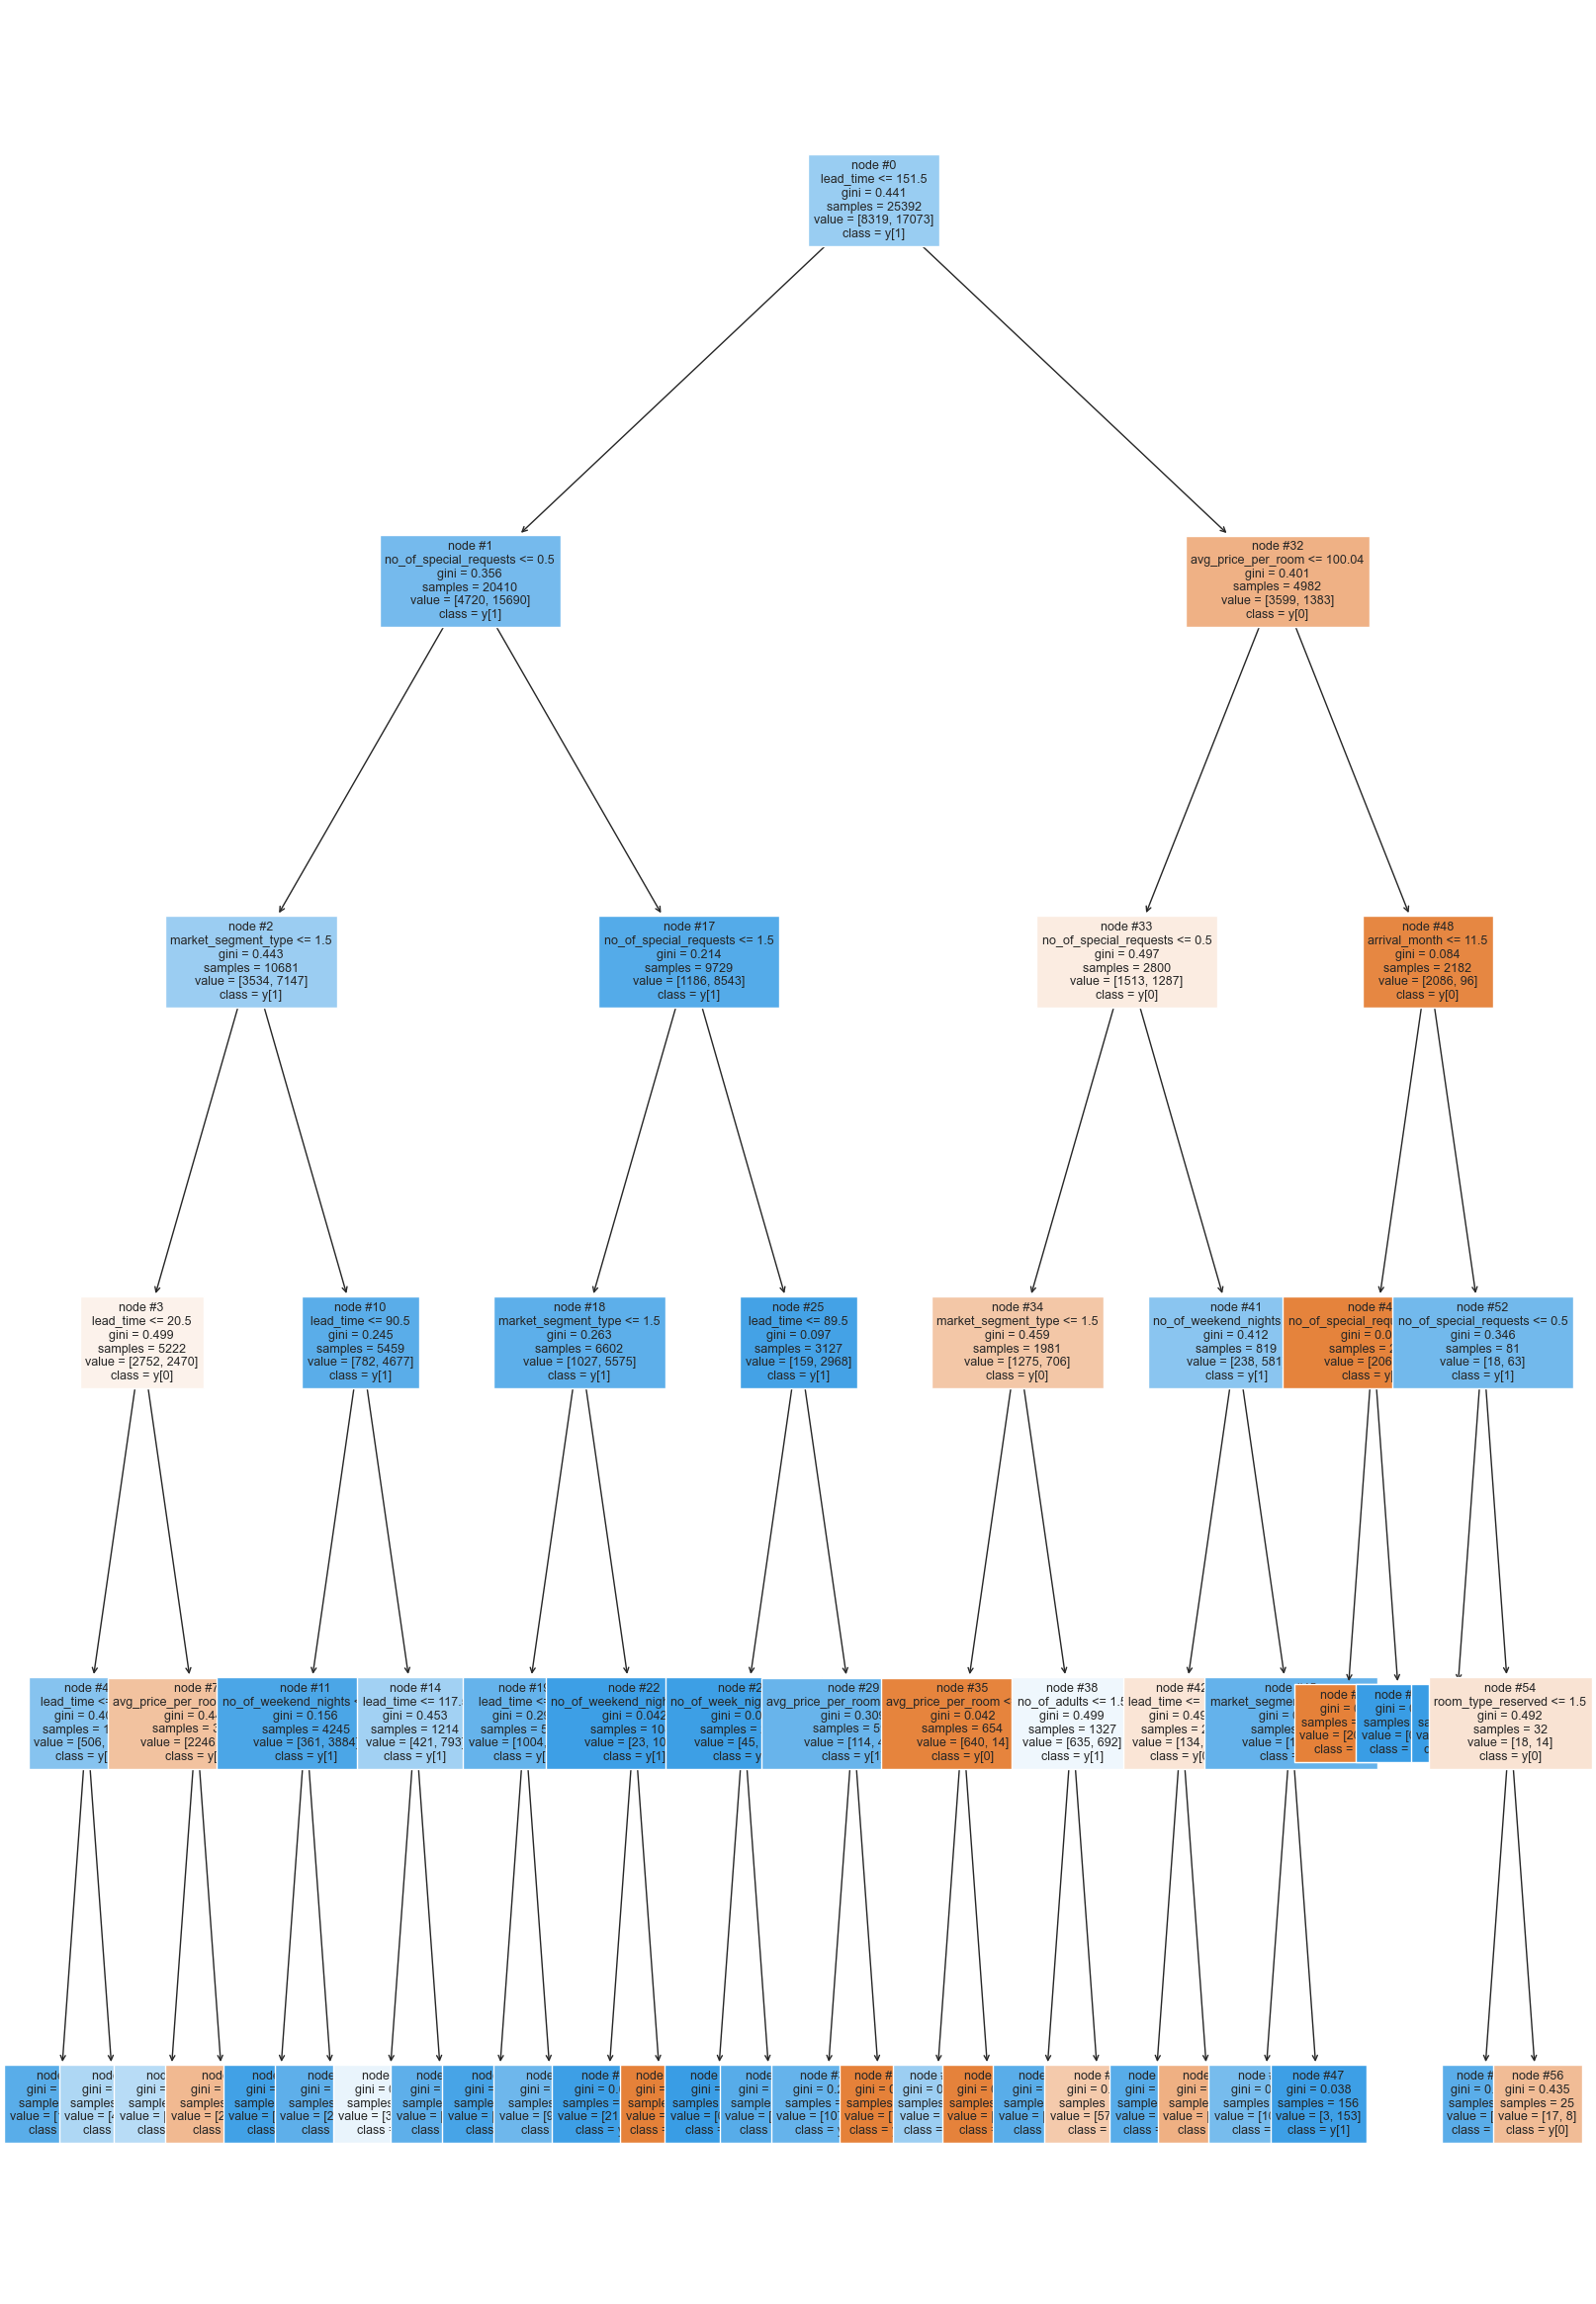

In [44]:
# We specify the size of the decision tree graph.
plt.figure(figsize=(20,30))
# We then plot the decision tree, with the features being labeled using the 'feature_names' variable created earlier.
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
# We display the graph with no coding messages. 
plt.show()

In [45]:
# Admittedly, the graph above looks a little complex and difficult to read. So, we can look athe text of the tree
# and then see how the tree branches out this way. 
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type <= 1.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- lead_time <= 3.50
|   |   |   |   |   |--- weights: [100.00, 622.00] class: 1
|   |   |   |   |--- lead_time >  3.50
|   |   |   |   |   |--- weights: [406.00, 686.00] class: 1
|   |   |   |--- lead_time >  20.50
|   |   |   |   |--- avg_price_per_room <= 74.69
|   |   |   |   |   |--- weights: [143.00, 223.00] class: 1
|   |   |   |   |--- avg_price_per_room >  74.69
|   |   |   |   |   |--- weights: [2103.00, 939.00] class: 0
|   |   |--- market_segment_type >  1.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- weights: [93.00, 2435.00] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- weights: [268.00, 1449.00] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- weigh

In [46]:
# We print an array with the magnititude of feature importances, which we can use to decide what 
# importance the model has given to each feature. 
# We name the column with the array of numerical values "Importance", with the index being the column names of the X_train
# data set and we sort the values in descending order. 
print (pd.DataFrame(dTree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                      Importance
lead_time                               0.500657
market_segment_type                     0.203872
no_of_special_requests                  0.136736
avg_price_per_room                      0.096339
no_of_adults                            0.026819
arrival_month                           0.017377
no_of_weekend_nights                    0.015656
no_of_week_nights                       0.001938
room_type_reserved                      0.000605
no_of_previous_bookings_not_canceled    0.000000
no_of_previous_cancellations            0.000000
repeated_guest                          0.000000
const                                   0.000000
arrival_date                            0.000000
required_car_parking_space              0.000000
type_of_meal_plan                       0.000000
no_of_children                          0.000000
arrival_year                            0.000000


The first thing we see 'lead_time' and 'market_segment_type' have the highest values, followed by 'no_of_special_requests'. That gives us the top three variables that make the largest impact regarding whether someone cancels their booking or not. 

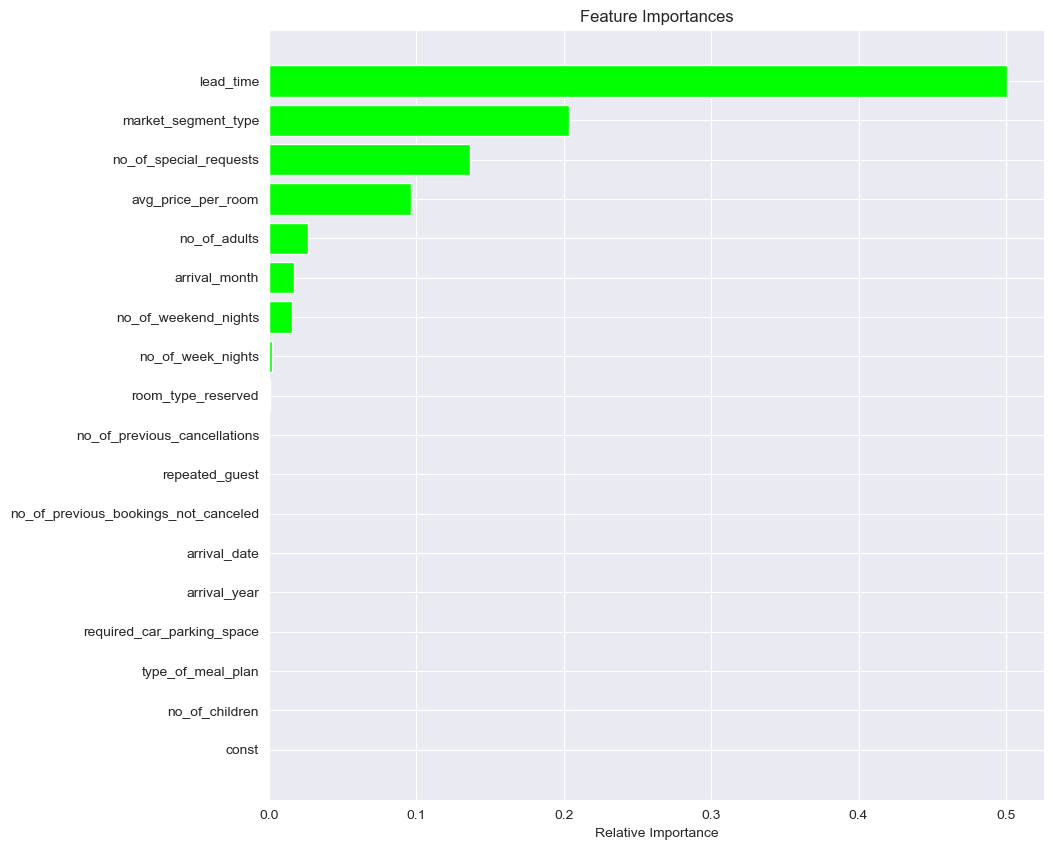

In [47]:
# Admittedly, the numbers from the above table may not be giving us enough or we're just cherry-picking.
# So, we're going to graph the importance of the features given to us by the model.

# We assign the array of the importances to the variable 'importances'
importances = dTree.feature_importances_
# We sort the variable and name it 'indices'
indices = np.argsort(importances)

# We specify the size of the graph
plt.figure(figsize=(10,10))
# We have the title of the graph be "Feature Importances"
plt.title('Feature Importances')
# We create bar plot horizontally, with a lime color and have it centralized.
plt.barh(range(len(indices)), importances[indices], color='lime', align='center')
# We have the y-axis marks be the values given under 'indices'.
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# We have the x-axis labeled "Relative Importance"
plt.xlabel('Relative Importance')
# We show the graph with no coding messages. 
plt.show()

In [52]:
# We define a function to compute the different metrics to check performance of a classification model built using sklearn,
# to check the classification model performance.
def model_performance_classification_sklearn(model, predictors, target):
 

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# We make a variable named 'decision_tree_perf_train' which takes the result of using the 
#'model_performance_classification_sklearn()' function to compute metrics of the model on the training dataset.
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.837823  0.921806   0.849738  0.884306

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

## Do we need to prune the tree?

In [55]:
# We can see that certain variables have a greater level of importance than others
# but we need to see how the model is to be improved
# without possibly stifling our model. 

# Our first approach is the GridSearch method, which searches for the best combination of hyperparamters
# from a predefined set of values and is part of pre-pruning. 

#Our first step is to choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

#We create a  grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

#We create a variable named 'acc_scorer', which is a type of scoring
# used to compare parameter combinations.
acc_scorer = make_scorer(recall_score)

# We run the grid search with Cross Validation
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
# We use the prior variable created, 'grid_obj' and fit it to the X_train
# and y_train datasets.
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)


C:\Users\Neal Daniels\Anaconda 2\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Neal Daniels\Anaconda 2\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Neal Daniels\Anaconda 2\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Neal Daniels\Anaconda 2\lib\site-packages\sklearn\tree\_classes.py", line 305, in fit
    if max_depth <= 0:
ValueError: The truth value of an array with mo

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

In [56]:
#We create a function to make a confusion matrix with percentages
#We call this function 'confusion_matrix_sklearn'
def confusion_matrix_sklearn(model, predictors, target):
   
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)


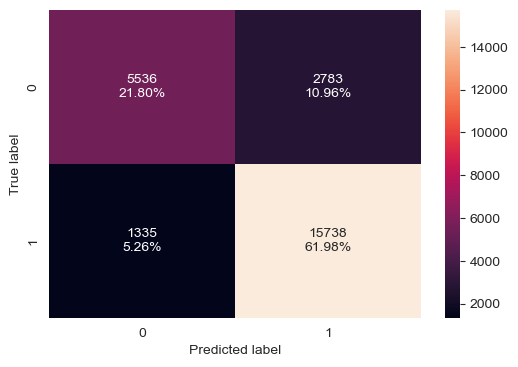

In [57]:
confusion_matrix_sklearn(dTree, X_train, y_train)

Looking at the confusion matrix of the training data set, we see that 21.80% were predicted to cancel and did so. We also see that an additional 10.96% also cancelled, though it was also predicted not to do so. We also see that 61.98% of the train data did stay true to their booking agreements while an additional 5.26% were predicted to cancel their booking but didn't. 

In [ ]:
# We now check the performance on the training dataset.

decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

We see that all the metrics checking the training data is remarkably high. However, now we need to check how it is with the test data set and see how it fares.

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test, y_test
)
decision_tree_perf_test

In this case, we see that the accuracy of the decision tree has dropped some but fortunately, its still relatively high. We also see that recall dropped and precision dropped but they're still relatively high. We also see that F1 score changed (which is understandable considering how the score is calculated using Precision and Recall) but the value is still remarkably high. 

In [ ]:
# We make a confusion matrix with percentages using the 'confusion_matrix_sklearn'
# function to see the numbers. 
confusion_matrix_sklearn(dTree, X_test, y_test)

We see that 21.75% of the customers of the Decision tree model, when applied to the test dataset, were predicted to cancel their bookings and did so. We also see that 5.71% were predicted to cancel their bookings but didn't, for one reason or another. We see that an additional 11.02% were predicted not to cancel their request but did anyway. Finally, we see that roughly 61.53% were predicted to not cancel their bookings and stayed true to their agreements.

Comparing this confusion matrix with the one created for the train data, we see only marginally changes in each category. This shows further validates our decision tree model is not overfitting nor underfitting. 

In [ ]:
# We now see whether our Decision tree model has become simplier
# using the GridSearch method.

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

Unfortunately, the model we see is much more complex and harder to make out than orignally. We'll try looking at another method called Cost Complexity Pruning.

In [59]:
# We now use the Cost Complexity method, and label the variable containing
# the method 'clf'
clf = DecisionTreeClassifier(random_state=1)
# We then make a new variable named 'path', which looks at the X_train and
# y_train dataset through the Cost Complexity function
path = clf.cost_complexity_pruning_path(X_train, y_train)
# We use these variables to perform post-pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [60]:
# We make a data frame, which looks at the ccp_alpha values and their 
# impurities.
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.006842
1     0.000000e+00    0.006842
2     6.352013e-07    0.006843
3     8.078458e-07    0.006843
4     1.125214e-06    0.006844
...            ...         ...
1321  7.158311e-03    0.285860
1322  1.347162e-02    0.299331
1323  1.668747e-02    0.316019
1324  2.423451e-02    0.364488
1325  7.608448e-02    0.440572

[1326 rows x 2 columns]

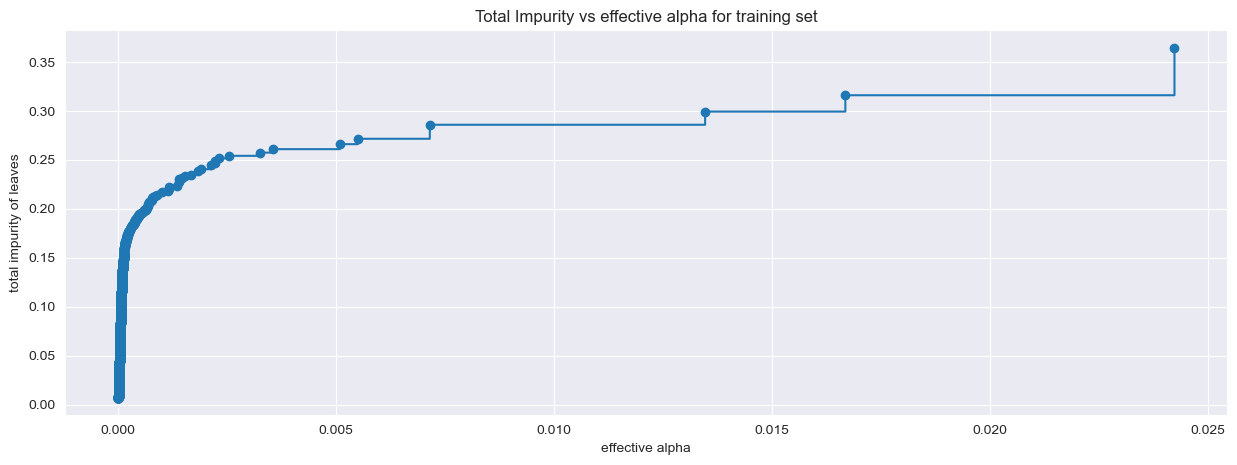

In [61]:
# Now, we graph the total impurity of the decision tree leaves and effective alpha for the training data set. 

#We specify that the graph is to be a certain size.
fig, ax = plt.subplots(figsize=(15, 5))
# We have the alpha and impurities in a graph, using the "steps_post" method
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
# We label the x-axis "Effective Alpha"
ax.set_xlabel("Effective Alpha")
# We label the y-axis "Total Impurtiy of Leaves"
ax.set_ylabel("Total Impurity of Leaves")
# We label the title of the plot "Total Impurity vs Effective Alpha for Training set"
ax.set_title("Total Impurity vs Effective Alpha for Training set")
# We shoe the graph with no coding messages. 
plt.show()

In [62]:
# We make an empty array named 'clfs'
clfs = []
# We run a for loop, which trains a decision tree using the effecitve alphas.
# The last value in 'ccp_alphas' is the aplahp value that prunes the entire
# decision tree (clf[-1]) with one node.
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07608448246807803


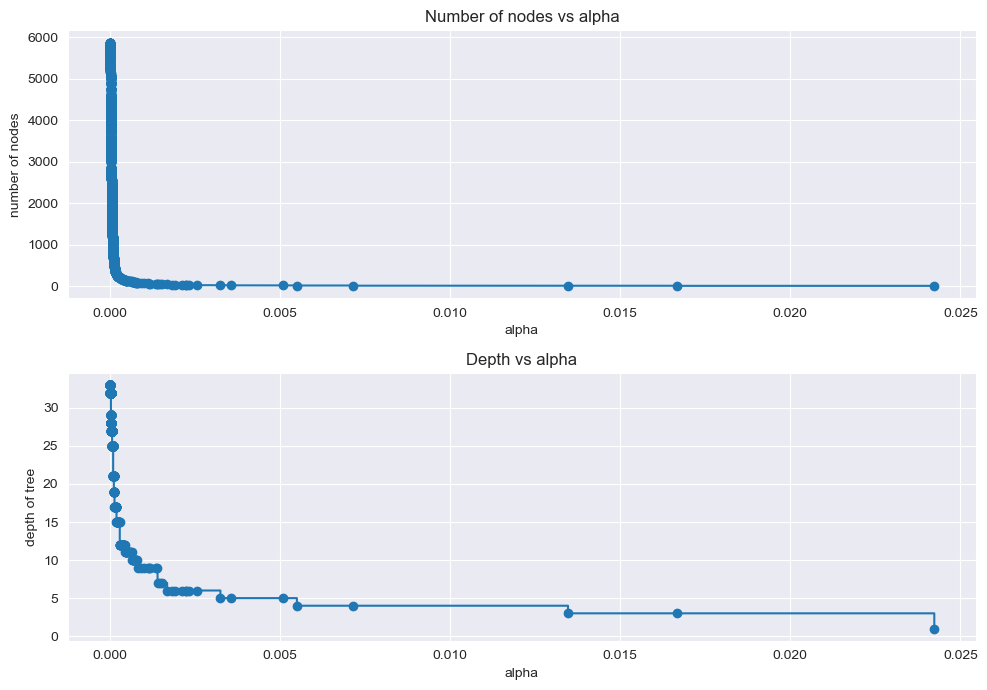

In [63]:
# We then remove the last element in clfs
clfs = clfs[:-1]
# Then we remove the last element in 'ccp_alphas'. We remove these values because 
# it is the trivial tree with only one node. Then we show the number of nodes and 
# tree depth. 
ccp_alphas = ccp_alphas[:-1]

# We then make a variable 'node_counts' which takes that number of nodes remaining
node_counts = [clf.tree_.node_count for clf in clfs]
# We then create a variable 'depth' which takes the depth of the pruned decision tree
depth = [clf.tree_.max_depth for clf in clfs]
# We specify the size of the graph
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
# We plot the graph, using the ccp_alphas and 'node_counts' variables.
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
# We label the x-axis 'alpha'
ax[0].set_xlabel("alpha")
# Label the y-axis "number of nodes"
ax[0].set_ylabel("number of nodes")
# Label the title of the graph "Number of nodes vs alph"
ax[0].set_title("Number of nodes vs alpha")
# We create another graph, looking at the 'ccp_alphas' and 'depth' variables
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
# We label hte x-axis 'alpha'
ax[1].set_xlabel("alpha")
# Label the y-axis "depth of tree"
ax[1].set_ylabel("depth of tree")
# Label the graph "Depth vs alpha"
ax[1].set_title("Depth vs alpha")
# We specify the layout of the graphs. 
fig.tight_layout()

From the above graph, it confirms that the number of nodes and and tree depth decreases as alpha increases. 

Now, we're not out of the woods yet as we're gooing to look at the Recalll and training in both the training and testing data sets. 

In [66]:
# We create an empty list variable named "recall_train"
recall_train = []
# We run a for loop, that gives us an list of recall values of the 
# train data set that we place
# inside the "recall_train" list. 
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [67]:
# We creat an empty list variable named "recall_test"
recall_test = []
# We run a for loop, whichi gives us a list of recall values of the
# test data set that we place
# inside the "recall_test"
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

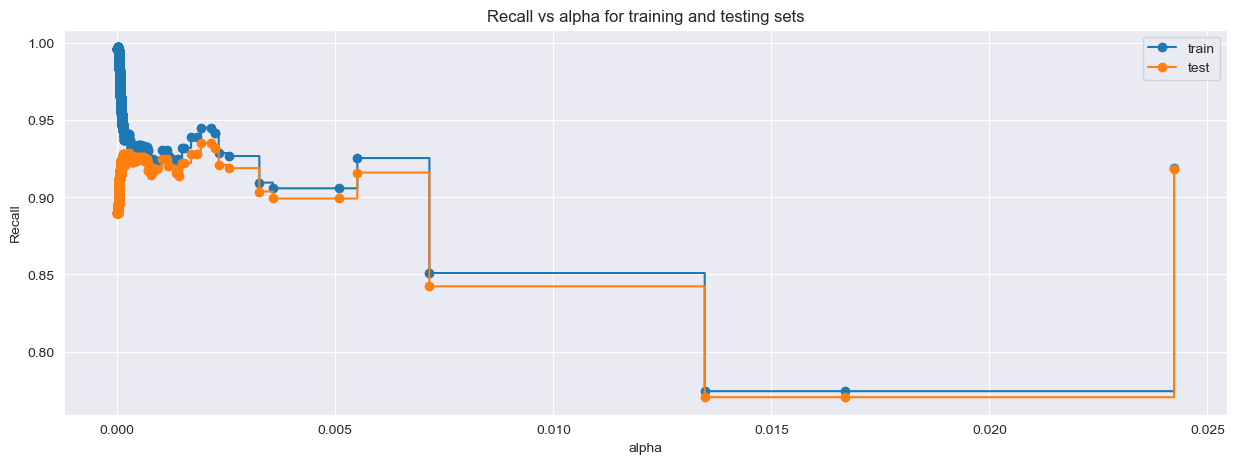

In [68]:
# We specify the size of the following graph
fig, ax = plt.subplots(figsize=(15, 5))
# We label the x-axis with "alpha"
ax.set_xlabel("alpha")
# We label the y-axis with "Recall"
ax.set_ylabel("Recall")
# We label the graph with "Recall vs alpha for training and testing sets"
ax.set_title("Recall vs alpha for training and testing sets")
# We graph the ccp_alphas on the x-axis, with the recall_train on the y-axis.
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
# We plot the ccp_alphas on the x-axis and recall_test on the y-axis.
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
# We include a legend to help us understand the graph.
ax.legend()
# We show the graph with no coding messages. 
plt.show()

We notice that the train recall stays relatively higher than that of the test data recall as alpha increases. This is natural as our model was formed based on the train dataset. However, the good thing to notice from this graph is that the recall in either case is not significantly different, meaning that we're relatively close to forming a precise decision tree model.  

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?